# Simple Linear Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("D:/12320158/Datasets/Housing.csv")

In [8]:
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
print(f"Number of instances: {df.shape[0]}")
print(f"Number of attributes: {df.shape[1]}")
print(df.describe())
print(" ")
print(df.isnull().sum())

Number of instances: 545
Number of attributes: 13
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  
 
price               0
area                0
bedrooms            0
bathrooms           0
stories             0


In [14]:
df.columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

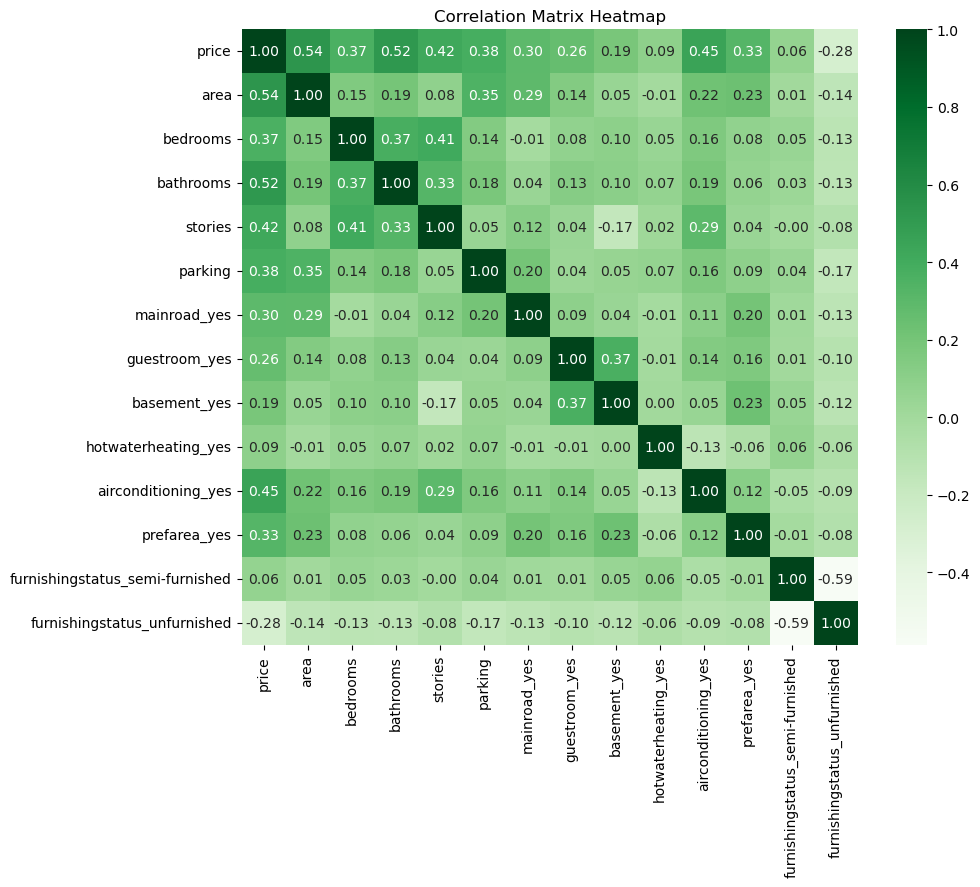

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Greens", cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()
X = df[['area']]
y = df['price']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
# Training model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting test data
y_pred = model.predict(X_test)
print(y_pred)

[5024060.33139816 5279498.23656143 4232202.82539203 4640903.47365326
 4198144.43803692 5373158.80178796 6139472.51727777 4636646.17523387
 3891618.951841   3661724.83719406 6165016.3077941  4187075.46214652
 4095969.27597162 3832016.77396957 4202401.73645631 4057653.59019713
 3363713.94783691 5066633.31559204 5002773.83930122 5066633.31559204
 4649418.07049203 5417860.43519154 4065742.45719396 4130027.66332672
 6024525.4599543  6752523.48966962 3827759.47555018 3789443.78977569
 8131888.17755128 3789443.78977569 4215173.63171447 3840531.37080835
 5066633.31559204 5328457.16838439 4545114.25921703 4470611.53687774
 4490195.10960693 3866075.16132467 3993794.11390631 3698763.33344273
 5909578.40263083 4057653.59019713 5245439.84920633 4300319.60010223
 5385930.69704613 5017674.38376908 5066633.31559204 4487640.7305553
 5939379.49156655 3789443.78977569 5694584.83245175 3789443.78977569
 5820175.13582369 4428038.55268387 4061910.88861651 3751128.1040012
 4960200.85510734 3534005.88461242 5

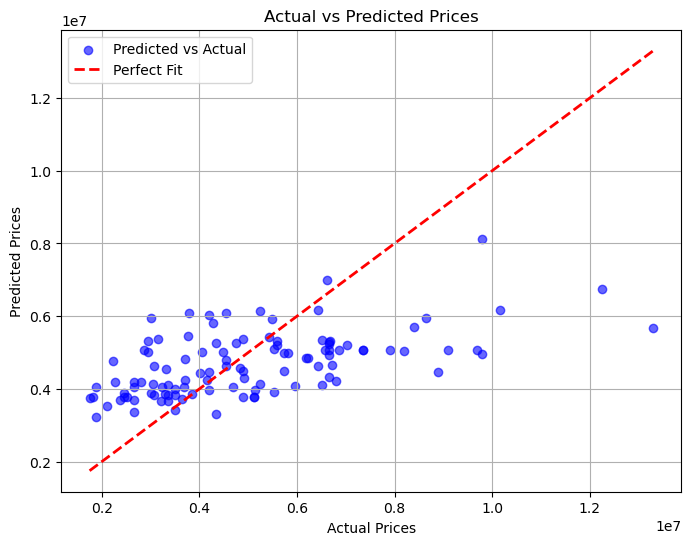

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

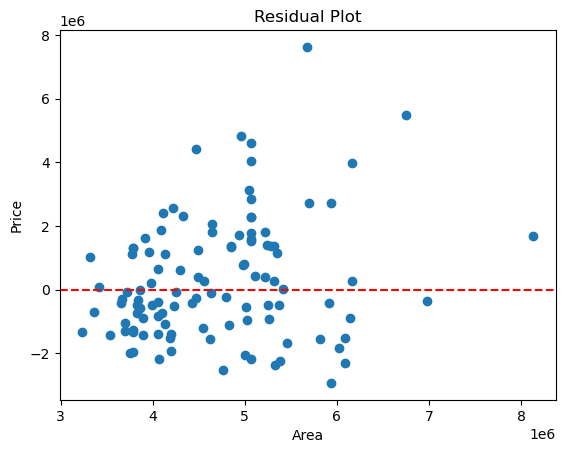

In [24]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,y_pred) 

0.27287851871974644

In [28]:
mean_squared_error(y_test,y_pred) 

3675286604768.185